In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import time

headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 OPR/57.0.3098.116'
}


for i in range(0,1365,35):
 
    time.sleep(2)
    url='https://music.163.com/discover/playlist/?order=hot&cat=%E5%8D%8E%E8%AF%AD&limit=35&offset='+str(i)
    reponse=requests.get(url=url,headers =headers)
    html=reponse.text
    soup=bs(html,'html.parser')
    
    ids=soup.select('.dec a')
    libs=soup.select('#m-pl-container li')
    print(len(libs))
    
    for j in range(len(libs)):
        name=ids[j]['title']
        link=ids[j]['href']
        play=libs[j].select('.nb')[0].get_text()
        user=libs[j].select('p')[1].select('a')[0]['title']
        print(name,link,play,user)
        with open('playlist1.csv','a+',encoding='utf-8-sig') as f:
            f.write(link + ','+ name + ',' + play + ',' + user + '\n')

In [18]:
from bs4 import BeautifulSoup as bs
import requests
import time

headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 OPR/57.0.3098.116'
}

for i in range(0,1365,35):
 
    time.sleep(2)
    url='https://music.163.com/discover/playlist/?order=hot&cat=%E5%8D%8E%E8%AF%AD&limit=35&offset='+str(i)
    reponse=requests.get(url=url,headers =headers)
    html=reponse.text
    soup=bs(html,'html.parser')
    
    ids=soup.select('.dec a')
    libs=soup.select('#m-pl-container li')
    print(len(libs))
    
    for j in range(len(libs)):
        name=ids[j]['title']
        link=ids[j]['href']
        play=libs[j].select('.nb')[0].get_text()
        user=libs[j].select('p')[1].select('a')[0]['title']
        print(name,link,play,user)
        with open('playlist1.csv','a+',encoding='utf-8-sig') as f:
            f.write(link + ','+ name + ',' + play + ',' + user + '\n')

from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import time

df=pd.read_csv('playlist1.csv',header =None,error_bad_lines=False,names=['link','name','play','user'])
headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 OPR/57.0.3098.116'
}

for i in df['link']:
    time.sleep(2)
    url ='https://music.163.com'+i
    reponse=requests.get(url =url,headers=headers)
    html=reponse.text
    soup=bs(html,'html.parser')
    if soup.select('#album-desc-more'):
        text=soup.select('#album-desc-more')[0].get_text().replace('\n','').replace(',','，')
    else:
        text='无介绍'
        
    Tags=soup.select('.u-tag i')
    tags=[]
    for i in Tags:
        tags.append(i.get_text())
    if len(tags)>1:
        tag='-'.join(tags)
    else:
        tag=tags[0]
        
    comments=soup.select('#cnt_comment_count')[0].get_text()
    
    songs=soup.select('#playlist-track-count')[0].get_text()
    
    collections=soup.select('#content-operation')[0].select('i')[1].get_text().replace('(','').replace(')','')
    
    play=soup.select('.s-fc6')[0].get_text()
    
    with open('messgae.csv','a+',encoding='utf-8-sig') as f:
        f.write(name+','+tag+','+comments+','+songs+','+collections+','+play+','+text+'\n')
    songs_name=soup.select('.f-hide li a')
    for j in songs_name:
        with open('songs_name.csv','a+',encoding='utf-8-sig') as f:
            f.write(j.get_text()+'\n')

35
放假了，开启养猪模式 /playlist?id=2641465606 10万 狗大叔爱听歌
柔软且甜丨波子汽水加樱桃味泡泡糖 /playlist?id=2648132004 50675 原创君
2019·喜气洋洋 | 小猪陪你过大年 /playlist?id=2641375892 186万 鮭魚先森
“世上所有的相遇，都是久别重逢” /playlist?id=2501001831 30万 鹿北浠
『网易云热歌』热评10w+（持续更新） /playlist?id=2204388891 8134万 -小乔丶
『国摇』一百支乐队一百种精神信仰 /playlist?id=2179431622 921万 浮梦沉生
S.H.E全专辑正序集 /playlist?id=2121558366 405万 雨不飄
2018年度最热新歌TOP100 /playlist?id=2578068117 4660万 网易云音乐
朗朗入耳的歌曲｜中文DJ版｜音魂不散 /playlist?id=2399099637 190万 借風擁妳
锦零，程嘉敏，黑猫合集！ /playlist?id=949006146 586万 一只遥同学
•国人的独立摇滚| 脱离商业束缚的音乐圣殿 /playlist?id=2301457765 74万 BeerBadBlood
那些喜欢到循环播放的歌 /playlist?id=2466312782 5654万 暧酱酱
予你情诗百首，余生你是我的所有 /playlist?id=2230318386 3860万 YouTube视频推荐
耳朵喜欢你 好听到可以单曲循环 /playlist?id=2232237850 6683万 鹿白川
粤语live | 听懂的歌越来越多 /playlist?id=2426284427 89万 云村废柴
精选丨林宥嘉 薛之谦 徐秉龙 毛不易 李荣浩 /playlist?id=2353275887 972万 岀海
谁说翻唱不好听 /playlist?id=2433860552 262万 苏鶍
你的青春里有没有属于你的一首歌？ /playlist?id=2201879658 7933万 mayuko然
古风伤恋｜待到红颜消 杳杳无归期 /playlist?id=948471242 1512万 迩ran
别急，甜甜的恋爱马上就轮到你了 /playlis

烟嗓/温柔男音 /playlist?id=2473954832 50万 叔叔不想那么糟
全民K歌大神集❤️（持续更新中） /playlist?id=2173813388 47万 是你的仙女啊
「古风控」那缕传世的轻烟薄雾 /playlist?id=2456265947 46万 画船吹风听雨眠
乐华七子NEXT歌曲 /playlist?id=2176607344 43万 崔小胖1706
编号0616小行星 /playlist?id=2070820359 40万 我没时间陪你玩了老实人zZ
『Y』☞德云女孩的*小曲小调小歌*张云雷为主 /playlist?id=2232063715 37万 -ZzZ小布布布布啊
【朱一龙应援曲收录】拨云见日，未来可期 /playlist?id=2332255396 33万 居老师的小甜甜
『古风电音』人声唱曲（非纯音乐） /playlist?id=2112390817 33万 叶千岚
Bilibili -鬼畜-哲学-神曲-持续更新 /playlist?id=2186223843 32万 MAX仙木
戏腔一曲终天涯【戏腔精选】 /playlist?id=2066905849 30万 嵇筠
【民国风】将军戏子，故梦旧词 /playlist?id=2120632298 29万 苏宇念
中考必背古诗文合集61篇 /playlist?id=2173055843 29万 惴洛
女声 古风 攻音 燃系~[那些攻气满满的女生] /playlist?id=2016124838 27万 瑬柒久拾
35
朱正廷 应援曲 /playlist?id=2176076700 26万 其实-也不过如此
【古风精选】乐正·绫&洛·天依 /playlist?id=2053568828 20万 ____Toronto丶
攒了一大堆好听的歌想和你一起听 /playlist?id=2353471182 5647万 鹿白川
【江沉晚吟时】江澄同人歌单 /playlist?id=2317045100 11万 伯仲言谋-
歌词唱透了心声，回忆模糊了眼眸 /playlist?id=2139324915 3422万 YouTube视频推荐
【天官赐福】同人曲 /playlist?id=2095609989 94145 青池墨颜
人这一辈子，最怕突然听懂了一首歌。 /playlist?id

每次在回家的路上 你会选择听哪些歌 /playlist?id=2632467373 402万 YouTube视频推荐
等一场大雪 还想听你的故事 /playlist?id=2542172966 301万 鹿白川
甜蜜暴击100%：我想和你谈一场不分手的恋爱 /playlist?id=2447521196 184万 柠檬木有枝
每一个夜晚 我把你写进梦里 /playlist?id=2617923373 184万 原创君
《腊八》让爱回家，让温暖相伴 /playlist?id=2621002029 102万 情思天鹅
『古风群星版』体验左拥右抱被环绕的感觉 /playlist?id=2054948745 56万 花色游戏
狠狠的撒一把狗粮，你我青春永不散场 /playlist?id=2463592296 262万 YouTube视频推荐
少年心气丨青春沮丧物语 /playlist?id=2554787901 167万 原创君
民谣女声☞陈粒 谢春花粥 Jam 程壁 房东的猫 /playlist?id=2161365723 253万 竹青春无痕
100段暖心情话，摘一句送给Ta吧 /playlist?id=2523428849 205万 YouTube视频推荐
那些藏在甜蜜糖衣外壳下的苦涩味道 /playlist?id=2627522953 194万 鹿白川
愿你足够勇敢说再见，生活将给你新的开始 /playlist?id=2573868971 112万 柠檬木有枝
谈恋爱的最好季节，你找到喜欢的人了吗 /playlist?id=2556268407 227万 雾与晨的杂货店
35
深情不及久伴 那些华语独立男声 /playlist?id=2554837554 153万 原创君
华语唯美说唱，砥砺前行路上的明灯 /playlist?id=2242462456 183万 YouTube视频推荐
说唱情话│糟糕！我要甜死在这个冬天♡♡ /playlist?id=2624667104 202万 银河失聲
华语烟嗓男声 |开口沦陷 满带着岁月的痕迹 /playlist?id=2611951915 99万 柠檬木有枝
暖冬木吉他 用声音温暖你的旅程 /playlist?id=2544684285 140万 原创君
「孤独症侯群」等待一个遥遥无期的人 /playlist?id=262

［德云社-张云雷］二爷唱过的歌 /playlist?id=2250000311 10万 孟婆汤里的胡萝卜
『执念』 欲问青天这人生有几何 /playlist?id=2556958401 10万 青风音乐库
正太音&少年音‖你温柔的就像融化的奶油糖 /playlist?id=2306356363 10万 霁枍
蔡徐坤应援曲＋cp应援曲！实时更新！爱坤！ /playlist?id=2261126831 10万 IKUN無藥可醫
【中文独立摇滚】最态度的中国声音 /playlist?id=2554954030 10万 StingrayAnd____
2018南京国风音乐会【玄武纪】敲定版 /playlist?id=2263942293 99114 一二三一九
「男声丨声控」你男朋友的声音 /playlist?id=2584831833 97585 雪江南酱
敢点进来 就敢让你怀孕【胆小勿进】 /playlist?id=2552728919 93062 Rain_VVT
那些你找不到资源的抖音翻唱 /playlist?id=2467496278 94305 MyHeatWiliGoOn
德云社相声精选【麻烦您看一下简介，谢wua /playlist?id=2122744635 91735 星空汐
20181103国风极乐夜曲目 /playlist?id=2466152094 90609 河山万里图一个你
地球最后的夜晚 电影‖预告片配乐 /playlist?id=2549764331 87560 SoldierOfFortune
音遇-抖抖专场 /playlist?id=2526486165 88286 Eddiee_
2018vsingerlive洛天依演唱会曲目 /playlist?id=2324252745 87627 fangtang2003
35
也许，再也不会相信爱情了 /playlist?id=2577797520 86527 鲍越by
CCTV《国家宝藏》第二季 | 持续更新|较全 /playlist?id=2553830268 86123 镜颜不惊艳
『2019跨年演唱会』各大卫视跨年歌曲合集 /playlist?id=2582559090 86098 爱学习的90后_
中文车载DJ /playlist?id=2467121494 85540 amg重来


我怕我醒来就抱不到你 /playlist?id=2483978437 8453 机遇多心酸
抖音兔子牙（翻唱合辑） /playlist?id=2579452776 8428 我是坑啦
带上耳机感受女说唱 /playlist?id=2492649142 8260 反刑
失恋歌单，只有歌曲才能安慰自己！ /playlist?id=2637683930 8150 基地音乐库
如果结局不好，我宁愿孤独终老 /playlist?id=2511881682 8071 什么时候才能遇见这样的你
多才多艺风趣幽默的双子【华语】 /playlist?id=2561994753 7999 Yang_DH
『贰零壹玖恭贺新春：猪年大吉万事如意』 /playlist?id=2538265493 8570 璨梦星辰
沈以诚 徐秉龙 刘思鉴 Todd Li 太一 Cosy /playlist?id=2375869793 7911 有琦出没
大哥很丧但大哥得酷 /playlist?id=2574326683 7760 DJ沈梦逸
嘘，听王嘉尔唱歌 /playlist?id=2508978028 7638 慕喊涵的日常
属于老男孩们的歌 /playlist?id=2525673235 7604 Rock二狗子
在抖音听到好听的【持续更新*永不断更】 /playlist?id=2572606695 7600 不知意深
35
抖音歌曲最新Bgm /playlist?id=2326192500 62万 小攀哟
2018歌曲40首合集 (虎扑步行街) /playlist?id=2625190603 7541 陈写字
最易上手尤克里里弹唱超精选 /playlist?id=2504187619 7445 AndyGFQ
古风 | 人生如梦，一尊还酹江月 /playlist?id=2514582824 7298 刘珂矣
中国相声大全 /playlist?id=2416304227 7231 寒鹤亭
中国动画：这是我们的童年时代 /playlist?id=2452593382 7197 共青团中央
斗鱼温柚歌单 /playlist?id=2610846948 7180 望鞅
说唱 艾热 gai 那吾 vava 王以太 /playlist?id=2476938465 7105 言心惊
青春有你选手前期作品(待更) 

《人不彪悍枉少年》影视剧原声歌曲 /playlist?id=2501149000 78597 NHDZ4-10
《风味人间》纪录片 原声收录 /playlist?id=2491689471 9528 Cosmos0717
入此门中皆为吾友 入此门中不问去留 /playlist?id=2440461122 63637 清茶hs
国摇/采样丨往来皆是菩提路 出入无非解脱门 /playlist?id=2491157645 59722 银河失聲
【渣反】朋友你听过春山恨吗 /playlist?id=2503509599 8016 一只遥同学
今年所有的遗憾 都是明年惊喜的铺垫 /playlist?id=2647636638 59067 朱家琦jar_
当说唱歌手邂逅轻松旋律 /playlist?id=2426821165 58433 月刊少女kaki酱
一个射手座的歌单 /playlist?id=2615429518 250 wo超级爱自由
南方初雪°＊快让我在这雪地上撒点野 /playlist?id=2547789676 87万 鮭魚先森
超甜/只可私藏 不能共享 /playlist?id=2452114012 7033 超喜欢冬天
深夜学习励志歌单，给前行的你 /playlist?id=2623548128 221 Wuli奶思敏
古风盘点| 一人一首原创曲（男神篇） /playlist?id=2441499611 20万 迩ran
【民谣】私藏歌单 /playlist?id=2547150455 6155 民谣姑娘慕子
35
咕咚版热门歌曲，好听到飞起 /playlist?id=2628241415 5924 音悦嗨
尤长靖的歌单 /playlist?id=2614845207 172 尤长靖_NASILEMAK资源博
歌手2019 第三季歌曲 /playlist?id=2644993081 200 陌路繁华-
2019抖音歌曲大全 /playlist?id=2629584905 15万 小攀哟
17岁的我怕给不了你那么多 /playlist?id=2647909816 161 不懂吃鱼
祝你岁月安好 前程似锦 以梦为马 /playlist?id=2449161245 37万 宁遇夏
龙登杰 口琴/双簧管 配乐合集 /playlist?id=2636716815 15

一百万个可能Christine Welch /playlist?id=2388015166 95914 Niushvi
《一人之下2》完整官方角色歌 /playlist?id=2241517454 94108 灯塔_Lara
〖该死的温柔〗王嘉尔 最全收录 /playlist?id=2503257111 87606 IcE江南
在我撑不下去的时候，请给我一个拥抱 /playlist?id=2633825295 716 螚安Vivienne
刺客伍六七bgm（网易没版权！） /playlist?id=2362747897 87455 羽毛球羽绒服都没有羽啊
如何做一个合格的舔狗 /playlist?id=2386254874 80596 Lokalive
忘川风华录（三无） /playlist?id=2371726773 72961 Cheongwan-blessing
前方高能请带耳机！！！ /playlist?id=2367893856 71944 苏强大老攻
『网易云热歌』评论20w+（持续更新） /playlist?id=2522889385 72557 -小乔丶
综艺 | 蒙面唱将猜猜猜第三季原曲合集完结 /playlist?id=2480217935 69365 PlusFeng
2018最火的歌曲 /playlist?id=2364987260 67123 环球童声音乐
【中文】适合学习时听的歌曲 /playlist?id=2327499036 65539 你的三三怡
大厂回忆杀—《偶像练习生》参赛曲目 /playlist?id=2424387921 66367 扑通扑通少女欣啊
10W 评论里的故事 /playlist?id=2216284341 65829 北漂老妖
35
久伴必定生情，多言始于厚爱 /playlist?id=2646420082 964 情思天鹅
我是江小白第二季 动画原声带 /playlist?id=2338095309 62469 衬衫的价格是玖镑拾伍便士
100首最适合开车听的歌曲(持续更新） /playlist?id=2294778582 61259 JustinHilton
《我是江小白》(第二季更新ing） /playlist?id=2497131372 58576 哔哩哔哩音乐娘
回忆杀系列2000-2010年代/伤感

我的风格 /playlist?id=2645818323 62 轻声诵读
WFY&CYW /playlist?id=2639759186 64 祝文安
哔哩哔哩2019拜年祭（收集中●口袋竞技场2） /playlist?id=2655163825 229 毒贝比
G$W大碟(持续更新) /playlist?id=2646400272 49 兔子不吃辣-
月 出. /playlist?id=2647399272 49 往-复-
2019情歌王林彦俊刘宇宁张新成金瀚 /playlist?id=2650436920 49 我想我喜欢这首歌
镜子里的怪物，穿着和我一样的衣服 /playlist?id=2646156251 46 RoiMarch
只想对你好 /playlist?id=2646028010 44 稚桦--梦槿
耳朵怀孕【慎入……会上头】（华语篇） /playlist?id=2647829296 44 优秀的轩少
网易官网推荐｜_中文系列 /playlist?id=2651925900 46 Armin_Hao
华晨宇 /playlist?id=2646980643 38 阿零已被占用
那些好听到单曲循环的歌. /playlist?id=2648430661 38 长夜星辰漫漫
宗介作品收录 /playlist?id=2652481490 44 爱唱歌的宗介
车载中文咚鼓 /playlist?id=2651818349 46 我家思思超可奈
惊艳时光的戏腔 /playlist?id=2651651930 35 纵使潸然无泪下
G.E.M.邓紫棋同款歌单 2019 Moving on！ /playlist?id=2650261762 35 GEM_Gloryer
【古风】南朝四百八十寺，多少楼台烟雨中 /playlist?id=2651345031 38 箐鹿衔草
轻柔一点，不要太刺激啦 /playlist?id=2652594473 40 道家败类
35
【前奏控】前奏吸引，一秒引爆 /playlist?id=2649701672 37 默余817
乾淨和菸酒嗓 /playlist?id=2645486322 35 格瑞特啊
China Music /playlist?id=2646542623 35 imsodepressed
古风虐心故事 /playlist

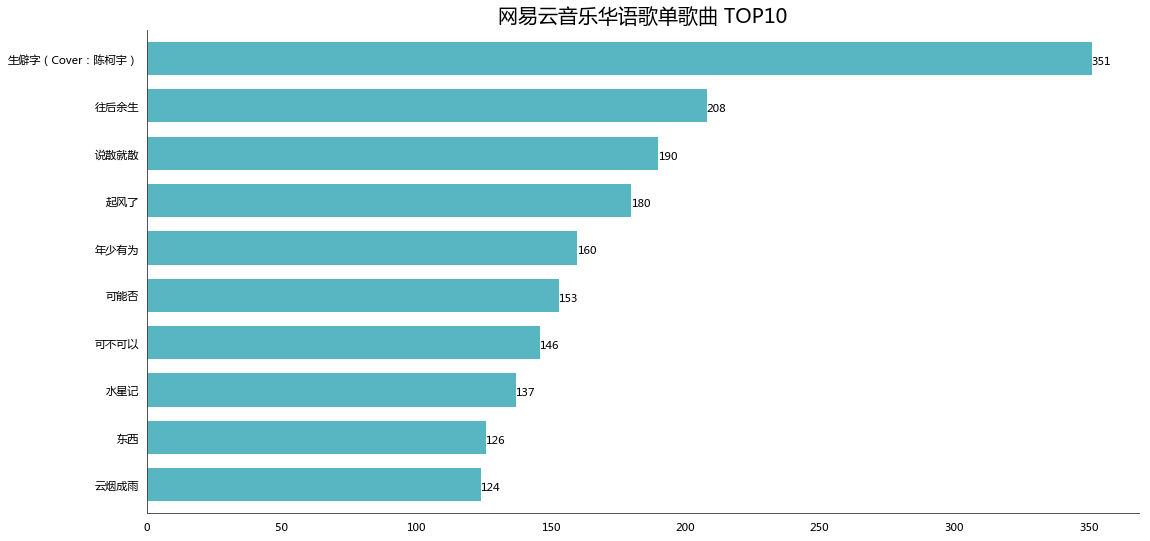

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('songs_name.csv', header=None, names=['title'], encoding='utf-8-sig')
# 数据聚合分组
place_message = df.groupby(['title'])
place_com = place_message['title'].agg(['count'])
place_com.reset_index(inplace=True)
place_com_last = place_com.sort_index()
dom = place_com_last.sort_values('count', ascending=False)[0:10]
# 设置显示数据
names = [i for i in dom.title]
names.reverse()
nums = [i for i in dom['count']]
nums.reverse()
data = pd.Series(nums, index=names)
# 设置图片显示属性, 字体及大小
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False
# 设置图片显示属性
fig = plt.figure(figsize=(16, 8), dpi=80)
ax = plt.subplot(1, 1, 1)
ax.patch.set_color('white')
# 设置坐标轴属性
lines = plt.gca()
# 设置坐标轴颜色
lines.spines['right'].set_color('none')
lines.spines['top'].set_color('none')
lines.spines['left'].set_color((64/255, 64/255, 64/255))
lines.spines['bottom'].set_color((64/255, 64/255, 64/255))
# 设置坐标轴刻度
lines.xaxis.set_ticks_position('none')
lines.yaxis.set_ticks_position('none')
# 绘制柱状图, 设置柱状图颜色
data.plot.barh(ax=ax, width=0.7, alpha=0.7, color=(16/255, 152/255, 168/255))
# 添加标题, 设置字体大小
ax.set_title('网易云音乐华语歌单歌曲 TOP10', fontsize=18, fontweight='light')
# 添加歌曲出现次数文本
for x, y in enumerate(data.values):
    plt.text(y+3.5, x-0.12, '%s' % y, ha='center')
# 显示图片
plt.show()

In [17]:
print(Tags)

[<i>华语</i>, <i>流行</i>, <i>民谣</i>]


In [ ]:
print(soup.select('.f-hide li a')

In [ ]:
df = pd.read_csv('songs_name.csv', header=None, names=['title'], encoding='utf-8-sig')
# 数据聚合分组
place_message = df.groupby(['title'])
place_com = place_message['title'].agg(['count'])
place_com.reset_index(inplace=True)
place_com_last = place_com.sort_index()
dom = place_com_last.sort_values('count', ascending=False)[0:10]

In [14]:
df = pd.read_csv('songs_name.csv', header=None, names=['title'], encoding='utf-8-sig')
# 数据聚合分组
place_message = df.groupby(['title'])
place_com = place_message['title'].agg(['count'])
place_com.reset_index(inplace=True)
dom = place_com_last.sort_values('count', ascending=False)
dom[0:10]
names = [i for i in dom.title]
names

['生僻字（Cover：陈柯宇）',
 '往后余生',
 '说散就散',
 '起风了',
 '年少有为',
 '可能否',
 '可不可以',
 '水星记',
 '东西',
 '云烟成雨',
 '盗将行',
 '最美的期待',
 '喜欢',
 '说谎',
 '星球坠落 (Live)',
 '我们',
 '追光者',
 '遇见',
 '光年之外',
 '白羊',
 '小半',
 '爱你',
 '不染',
 '纸短情长',
 '夜空中最亮的星',
 '去年夏天',
 '空空如也 ',
 '陷阱',
 '岁月神偷',
 '目不转睛',
 '成全',
 '红昭愿',
 '理想三旬',
 '可乐',
 '平凡之路',
 '晚安',
 '感谢你曾来过',
 '一百万个可能',
 '戒烟',
 '烟火里的尘埃',
 '红色高跟鞋',
 '成都',
 '后来',
 '全部都是你',
 '醉赤壁',
 '讲真的',
 '春风十里',
 '那些你很冒险的梦',
 '我想',
 'GOOD NIGHT',
 '你要的全拿走',
 '椿',
 '过客',
 '纸短情长（完整版）',
 '像我这样的人',
 '慢慢喜欢你',
 'Lover Boy 88',
 '侧脸',
 '浪人琵琶',
 'Shape of You',
 '123我爱你',
 '假装',
 '需要人陪',
 '学猫叫',
 '你就不要想起我',
 '说爱你',
 '撒野（Cover：欸-61）',
 '给陌生的你听 ',
 '非酋',
 '断线',
 '流浪',
 '东西（Cover：林俊呈）',
 '越来越不懂',
 '牵丝戏',
 '遥不可及的你',
 '沙漠骆驼',
 '倒数',
 '后来的我们',
 '卡路里',
 '好久不见',
 '走马',
 '再也没有',
 '拥抱',
 '暧昧',
 'Something Just Like This',
 '浮生',
 '借我',
 '你，好不好？',
 '哑巴',
 '可惜没如果',
 '小幸运',
 '生僻字',
 '我好想你',
 '做我的猫',
 '远走高飞',
 '买条街',
 '广东十年爱情故事',
 '天份',
 '浪费',
 '甜',
 '离人愁',
 'That Girl',
 '易燃易爆炸',
 '房间',
 '其实都没有',
 '醒着醉',
 '浪子

In [11]:
place_com_last = place_com.sort_index()
place_com_last

,title,count
0,- 全部都是你remix,1
1,:(,1
2,Blown Away (Extended Mix),1
3,Devotion (Jewelz & Sparks Bootleg),1
4,Feelings,2
5,I won't stop singing till you hear me,1
6,Lara's Castle,1
7,MUSE,2
8,Only A Girl,1
9,Scents of Love Pt.3,1
